# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<div style="background-color: #ffffff; border-left: 6px solid #0066cc; margin-top: 20px; padding: 10px;">

<font size="3" color="#003366"> <!-- Altera a cor e o tamanho do texto -->

1. #### [Problem Understanding](#problem-understanding)    
2. #### [Data Understanding and Basic EDA](#data-understanding-and-basic-eda)
3. #### [Defining Network Architecture and Features](#network-architecture-features)
4. #### [Creating and Executing the Pipeline](#create-the-pipeline)

</font>
</div>

# <a id="problem-understanding">Problem Understanding</a>

- This project aims to predict the `Concrete Compressive Strength` based on several input variables related to the concrete composition and curing time. The original problem was adapted from a course project, where the goal was to improve prediction accuracy by modifying the network architecture and applying proper data preprocessing techniques.
  
- The main objective was to progressively refine the model's performance through different approaches: baseline, data normalization, increased training epochs, and the addition of hidden layers. These steps allowed me to explore how different configurations affect the network's learning and prediction capabilities.

- Another key goal was to learn more about `encapsulation`, making the entire process—from data preparation to model evaluation—streamlined and reusable. In the final implementation, the model can be built, trained, and evaluated by a single function call, with flexibility to set different variables and predict outcomes for various scenarios.
  
- By the end of this project, I had a deeper understanding of how the architecture, normalization, and training process affect model performance, allowing me to make more informed decisions when designing neural networks for regression tasks.

## Data Dictionary

| Name                           | Data Type   | Measurement           | Description       | Dtype   | Non-Null Count |
|---------------------------------|-------------|-----------------------|-------------------|---------|----------------|
| Cement (component 1)            | Quantitative| kg in a m³ mixture     | Input Feature    | float64 | 1030           |
| Blast Furnace Slag (component 2)| Quantitative| kg in a m³ mixture     | Input Feature    | float64 | 1030           |
| Fly Ash (component 3)           | Quantitative| kg in a m³ mixture     | Input Feature    | float64 | 1030           |
| Water (component 4)             | Quantitative| kg in a m³ mixture     | Input Feature    | float64 | 1030           |
| Superplasticizer (component 5)  | Quantitative| kg in a m³ mixture     | Input Feature    | float64 | 1030           |
| Coarse Aggregate (component 6)  | Quantitative| kg in a m³ mixture     | Input Feature    | float64 | 1030           |
| Fine Aggregate (component 7)    | Quantitative| kg in a m³ mixture     | Input Feature    | float64 | 1030           |
| Age                             | Quantitative| Day (1 ~ 365)          | Input Feature    | int64   | 1030           |
| Concrete compressive strength   | Quantitative| MPa                    | Target Variable   | float64 | 1030           |

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

#import warnings
#warnings.filterwarnings('ignore')

# Configuring Pandas DataFrame and Numpy Arrays to display all information
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configuring style and color palette to be used in the plots
sns.set_theme(style="whitegrid", palette="viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

## <a id="data-understanding-and-basic-eda">Data Understanding and Basic EDA</a>

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


Cement                0.0
Blast Furnace Slag    0.0
Fly Ash               0.0
Water                 0.0
Superplasticizer      0.0
Coarse Aggregate      0.0
Fine Aggregate        0.0
Age                   0.0
Strength              0.0
dtype: float64

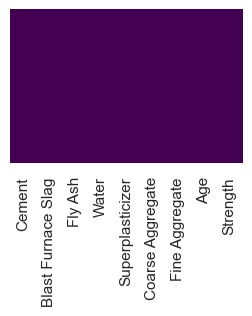

In [6]:
plt.figure(figsize=(3,2))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df.isnull().sum() / len(df)

In [7]:
df.duplicated().sum()

25

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<Axes: >

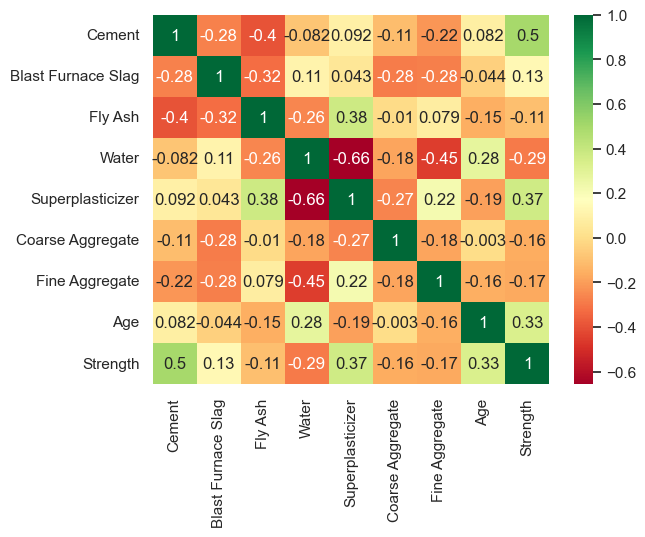

In [9]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='RdYlGn')

In [10]:
df.drop_duplicates(inplace=True)

# Defining Network Architecture and Features

| Layer                | Neurons | Activation Function | Observations                          |
|-----------------------|-----------|--------------------|--------------------------------------|
| **Input Layer**           | 7       | -                  |  7 Input Features                |
| **1st Hidden Layer**   | 128       | ReLU               | Start with 128 neurons             |
| **2nd Hidden Layer**    | 64       | ReLU               | Decrease to 64 neurons           |
| **3rd Hidden Layer**   | 32        | ReLU               | Decrease to 32 neurons            |
| **Output Layer**             |  1        |  -           | Strength Prediction                |

## Network Features

### Early Stopping
- Early Stopping prevents the model from overfitting by stopping the training when there is no further improvement on the validation set. This ensures that the model does not waste time training on noise and retains the best performance achieved.

### Dropout Layers
- Dropout layers help reduce overfitting by randomly disabling a fraction of neurons during training, which forces the model to learn more generalizable patterns and prevents it from relying too heavily on specific neuron connections.

### Loss function and Optimizer
- Loss Function: `Mean Squared Error`
- Optimizer: `Adam`

### Number of Epochs
- Epochs: 50

# Creating and Executing the Pipeline

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
# Function to create the model
def build_model(input_shape):
    model = Sequential()
    
    model.add(Input(shape=(input_shape,))) # Input Layer
    
    model.add(Dense(units=128, activation='relu')) # 1st Hidden Layer
    model.add(Dropout(0.2)) # Dropout Layer - Avoid Overfitting
    
    model.add(Dense(units=64, activation='relu')) # 2nd Hidden Layer
    model.add(Dropout(0.3)) # Dropout Layer - Avoid Overfitting
    
    model.add(Dense(units=32, activation='relu')) # 3rd Hidden Layer
    model.add(Dropout(0.3)) # Dropout Layer - Avoid Overfitting
    
    model.add(Dense(units=1))  # Output layer
    
    # Compiling the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    return model

In [17]:
# Function to train the model
def train_model(model, X_train, y_train, epochs=50, batch_size=64, validation_split=0.2):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, 
                        epochs=epochs,
                        batch_size=batch_size, 
                        validation_split=validation_split, 
                        callbacks=[early_stopping], verbose=0)
    
    return history

In [18]:
# Function for evaluation and visualizations
def evaluate_model(model, history, X_test, y_test):
    # Plotting Loss
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=history.history['loss'], label='Training Loss')
    sns.lineplot(data=history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Predictions
    y_pred = model.predict(X_test)
    
    # Plotting Predictions vs True Values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Model Predictions')
    plt.title('Predictions vs True Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

    # Displaying final metrics
    last_epoch = len(history.history['loss']) - 1
    print('-' * 50)
    print(f"Last Epoch: {(last_epoch + 1):.2f}")
    print(f"Training Loss: {history.history['loss'][last_epoch]:.2f}")
    print(f"Validation Loss: {history.history['val_loss'][last_epoch]:.2f}")
    print(f"Training MAE: {history.history['mean_absolute_error'][last_epoch]:.2f}")
    print(f"Validation MAE: {history.history['val_mean_absolute_error'][last_epoch]:.2f}")

In [19]:
# Function to execute the pipeline multiple times and collect MSEs
def regression_pipeline(df, target_col='Strength', num_iterations=50, test_size=0.2, plot_results=False):
    mse_list = []  # Empty list to store MSEs
    best_loss = float('inf')  # Variable to track the lowest test loss
    best_model = None  # Variable to store the model with lowest loss
    best_history = None  # Variable to store the training history of the best model
    best_iteration = -1  # Variable to store the iteration number with the lowest test loss
    
    # Splitting the data
    X = df.drop([target_col, 'Age'], axis='columns')
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Standardizing the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for i in range(num_iterations):
        # Creating the Model
        model = build_model(X_train.shape[1])
        
        # Training the Model
        history = train_model(model, X_train, y_train)
        
        # Evaluating the Model
        test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
        mse_list.append(test_loss)  # Collecting MSE
        
        print(f"Regression Model {i + 1} - Test Loss: {test_loss:.2f}")

        # Check if this iteration has the lowest test loss
        if test_loss < best_loss:
            best_loss = test_loss
            best_model = model  # Storing the model with lowest loss
            best_history = history  # Storing the history of the best model
            best_iteration = i + 1  # Storing the best iteration number

    # Calculating mean and standard deviaton
    mse_mean = np.mean(mse_list)
    mse_std = np.std(mse_list)
    
    print(f"\nMean MSE over {num_iterations} iterations: {mse_mean:.2f}")
    print(f"Standard Deviation of MSE: {mse_std:.2f}")
    print(f"Best Test Loss: {best_loss:.2f} on iteration {best_iteration}")

    # Plotting the results for the best iteration
    if plot_results and best_model is not None:
        evaluate_model(best_model, best_history, X_test, y_test)

Regression Model 1 - Test Loss: 213.13
Regression Model 2 - Test Loss: 213.78
Regression Model 3 - Test Loss: 214.30
Regression Model 4 - Test Loss: 228.90
Regression Model 5 - Test Loss: 203.02
Regression Model 6 - Test Loss: 277.01
Regression Model 7 - Test Loss: 199.72
Regression Model 8 - Test Loss: 199.91
Regression Model 9 - Test Loss: 244.62
Regression Model 10 - Test Loss: 210.62
Regression Model 11 - Test Loss: 211.18
Regression Model 12 - Test Loss: 228.11
Regression Model 13 - Test Loss: 204.37
Regression Model 14 - Test Loss: 206.15
Regression Model 15 - Test Loss: 217.50
Regression Model 16 - Test Loss: 200.53
Regression Model 17 - Test Loss: 208.00
Regression Model 18 - Test Loss: 203.21
Regression Model 19 - Test Loss: 201.75
Regression Model 20 - Test Loss: 211.57
Regression Model 21 - Test Loss: 222.68
Regression Model 22 - Test Loss: 207.35
Regression Model 23 - Test Loss: 216.97
Regression Model 24 - Test Loss: 207.76
Regression Model 25 - Test Loss: 203.93
Regressio

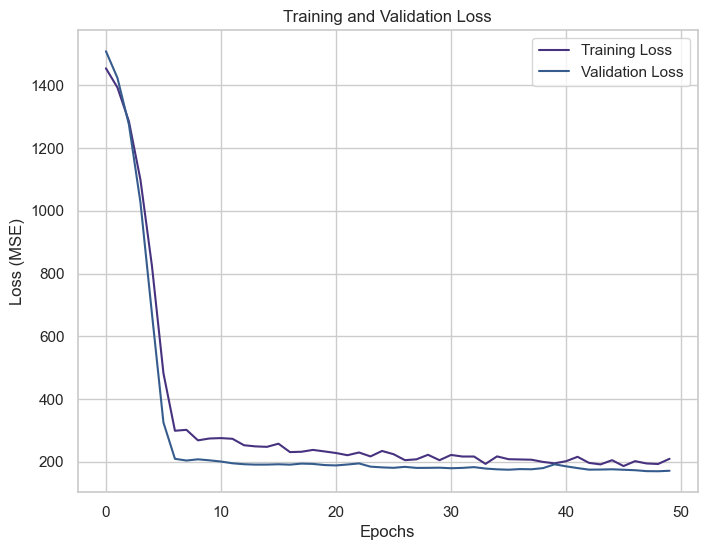

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


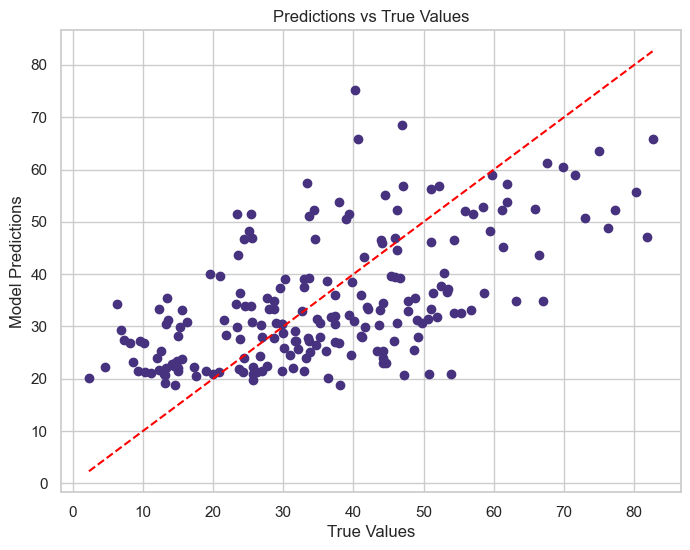

--------------------------------------------------
Last Epoch: 50.00
Training Loss: 209.45
Validation Loss: 171.24
Training MAE: 11.63
Validation MAE: 10.67


In [20]:
# Executing the pipeline 50 times
regression_pipeline(df, target_col='Strength', num_iterations=50, plot_results=True)